# Problem Statement: 
* Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.
* Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.
1. Recommend the steps to retain existing telecom customers.
2. Build customer churn, prediction model.


1. Imports
2. Info 
3. Customer Analysis
    1. Steps to retain customers
4. Machine Learning Model 
    0. EDA
    1. Feature Engineering 
    2. Decision Tree | Confusion matrix, Classification Report
    3. Random Forest | Confusion matrix, Classification Report
    4. Gradient Boost | Confusion matrix, Classification Report
    5. KNN | Confusion matrix, Classification Report
5. Evaluation AUC ROC Curve for all models 
6. Conclusion


# Imports

In [1]:
!pip install ptitprince

     |████████████████████████████████| 52 kB 384 kB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8427 sha256=f892e18d69e066d63bf317f74e6be946999e76f01c1d6718a36399aaeda138ec
  Stored in directory: /root/.cache/pip/wheels/58/a5/f2/55920bbc5d0e6fb74b2370e1e52e07c236ba7b621236ea5a81
Successfully built ptitprince


In [2]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

# Machine Learning
## Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


# INFO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Customer Analysis

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

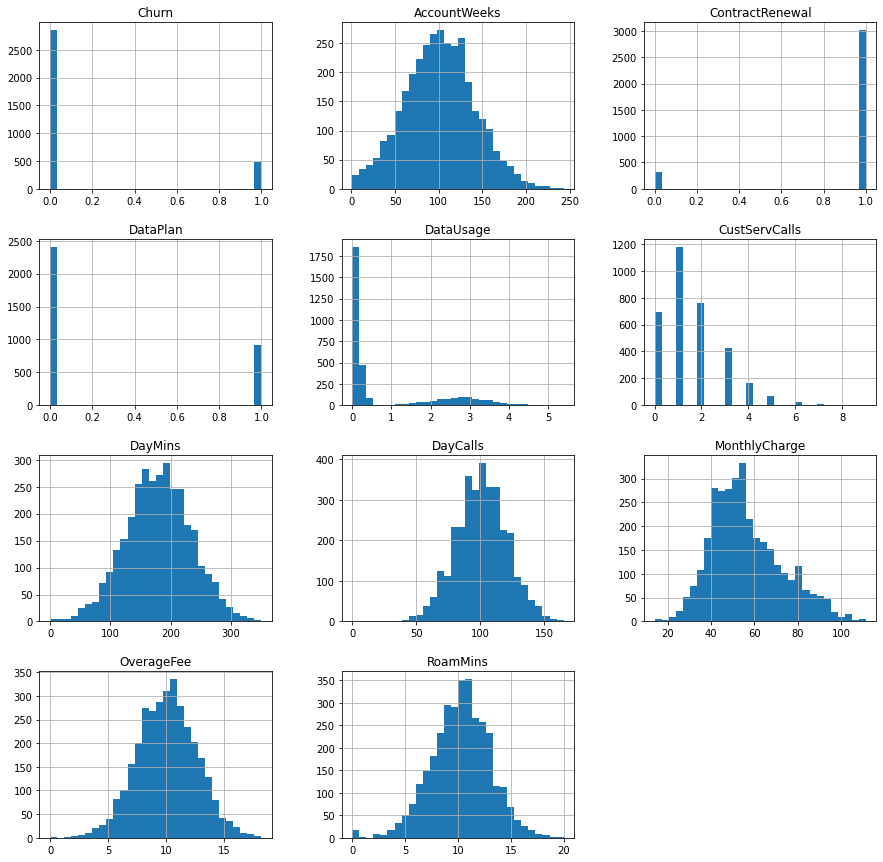

In [6]:
df.hist(figsize=(15,15), bins=30)

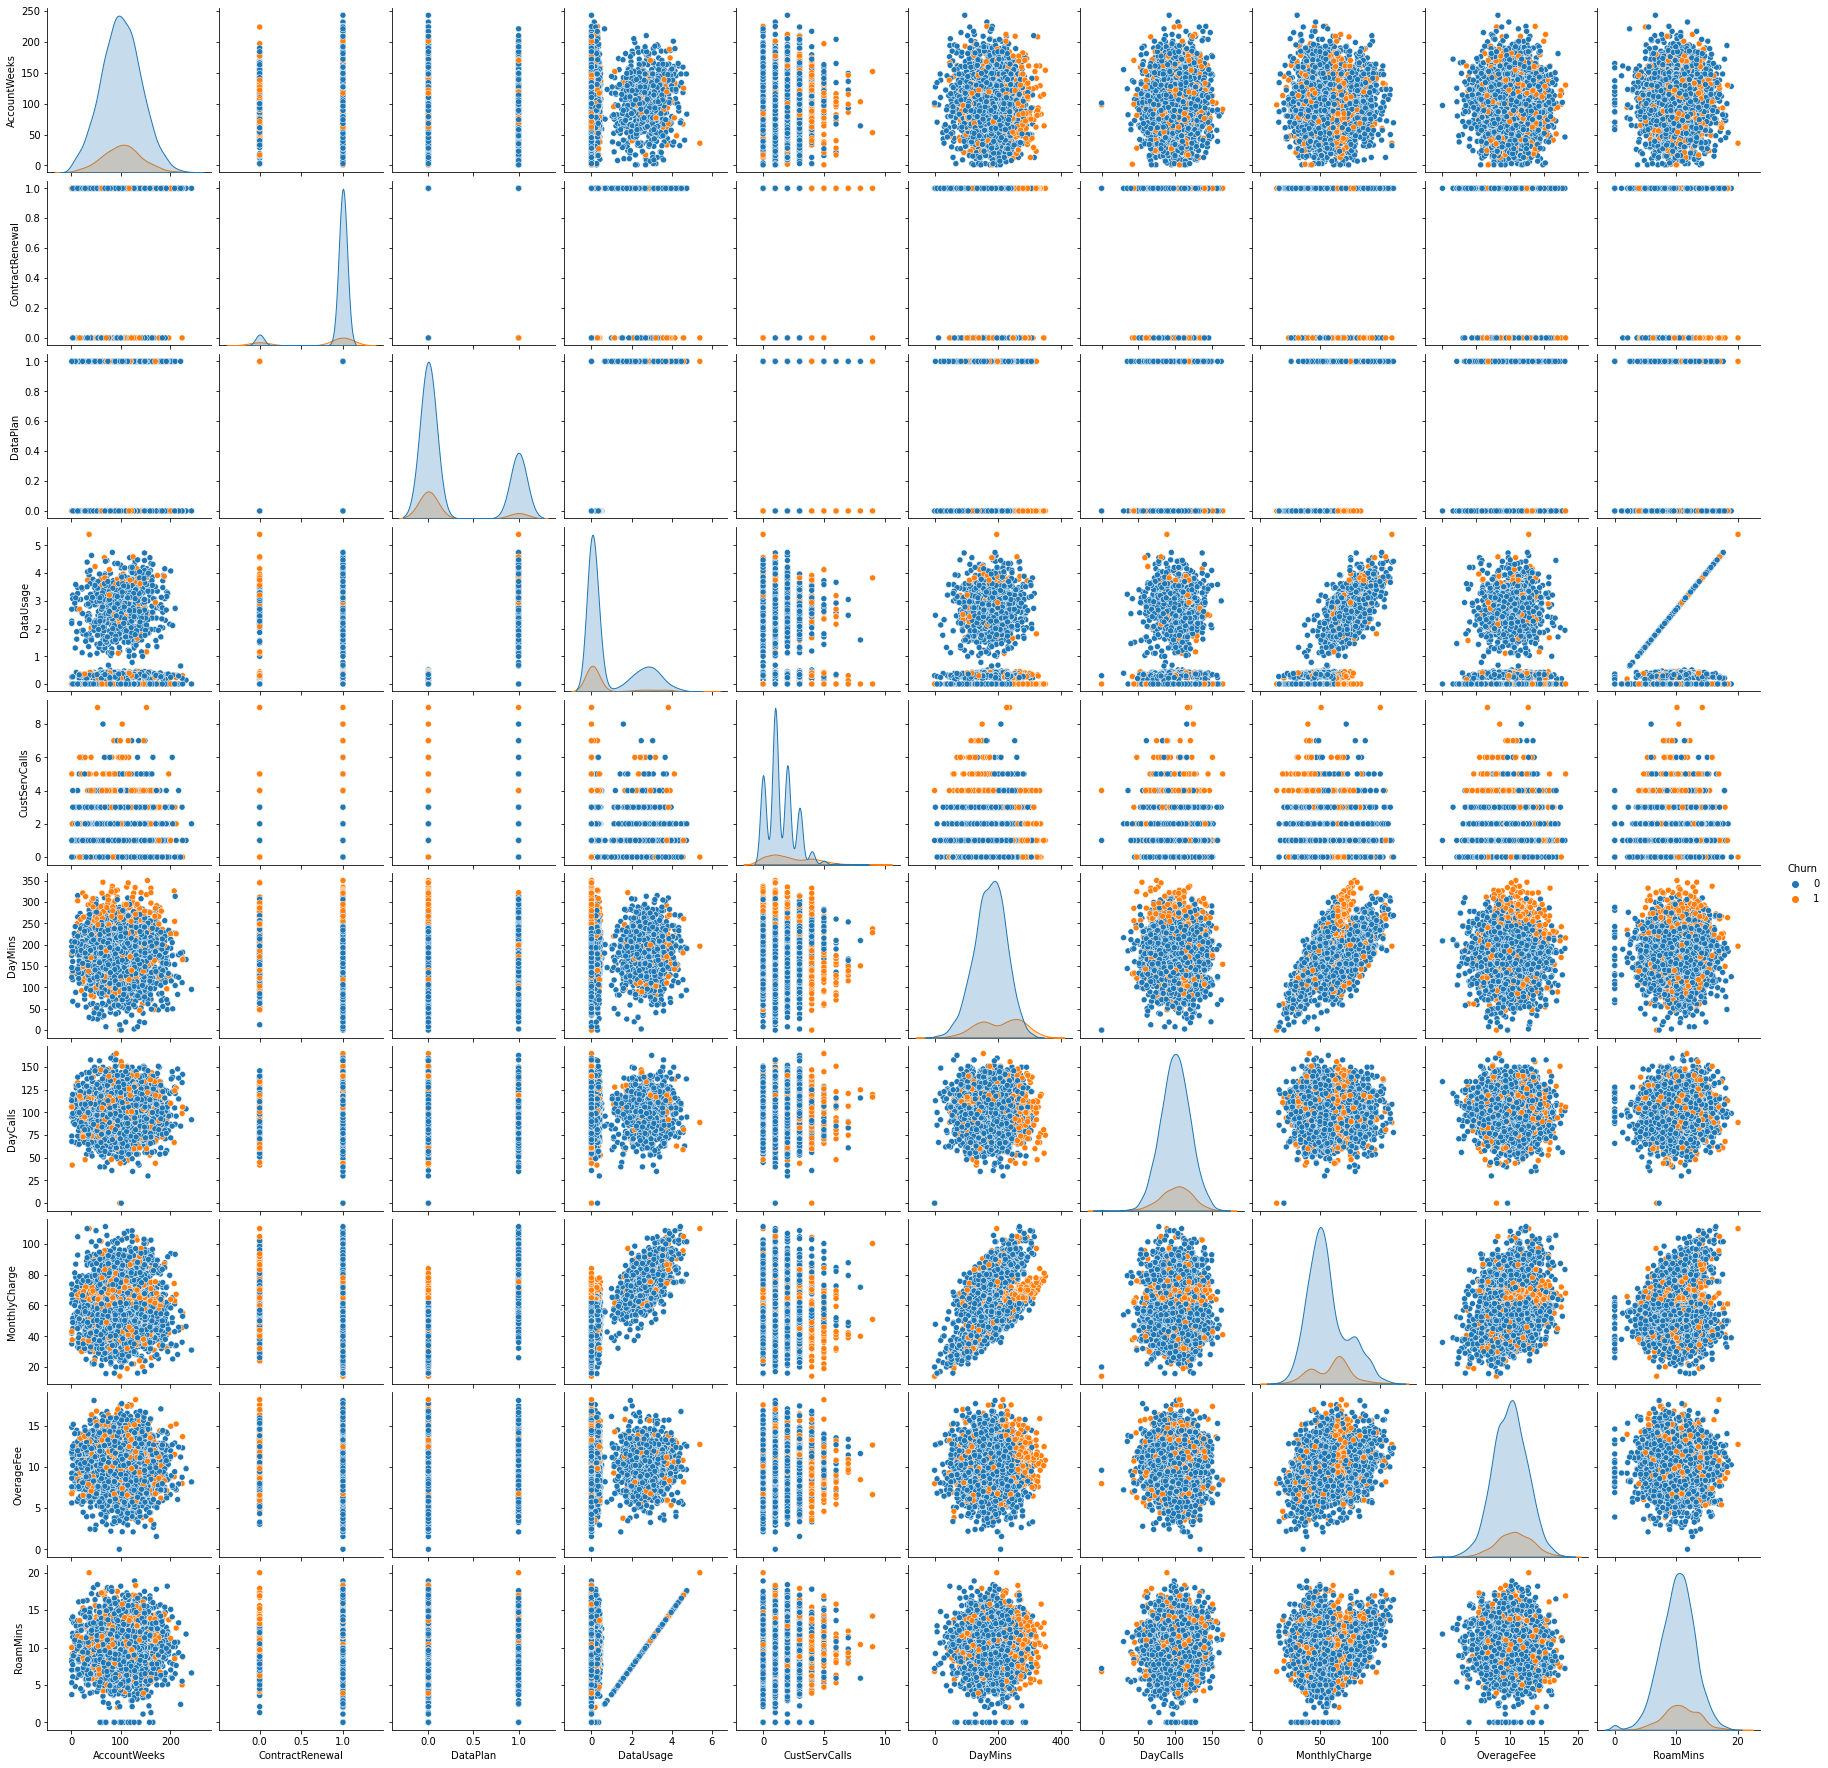

In [7]:
sns.pairplot(df, hue="Churn")

<AxesSubplot:title={'center':'All Over Churned Ratio'}, ylabel='Churn'>

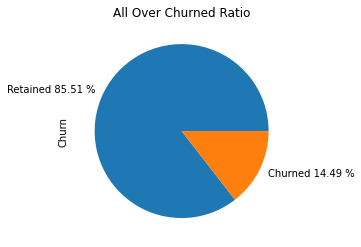

In [8]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

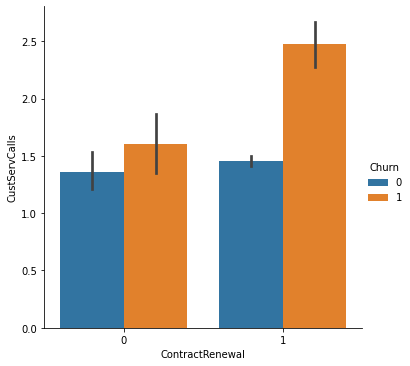

In [9]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

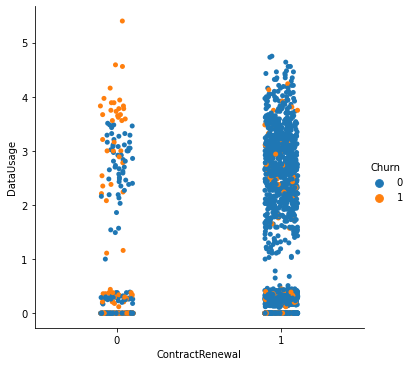

In [10]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

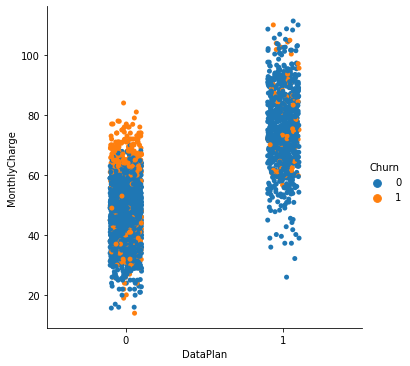

In [11]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df)

In [12]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

## 1. Daily Min vs Monthly Charge 

Text(0.5, 1.0, 'Churn=0&1')

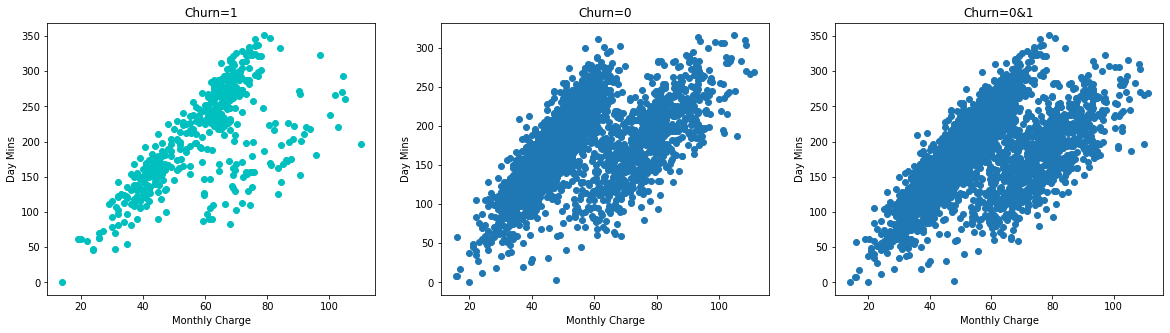

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

## 2. Data Usage vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

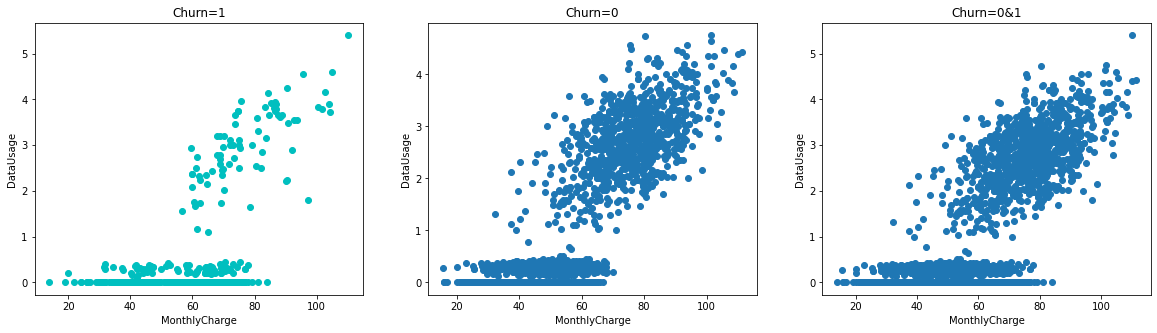

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

**In the data usage case also we can easily consider two segments.
Consider the segment as below,**
1. Customers whose monthly charges are up to 85 and data usage around 0-1.
2. Customers whose monthly charges are up to 30 onwards and data usage around is >1.

### Manual Customer Segmentation

In [15]:
# Manual Customer Segmentaion
seg1 = df.loc[(df["MonthlyCharge"]<85) & (df["DataUsage"]<=1)] # Segment1
seg2 = df.loc[(df["MonthlyCharge"]>30) & (df["DataUsage"]>1)] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

### Segment 1. Customers who's monthly charges are upto 85 and data usage around 0-1.

In [16]:
seg1

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [17]:
seg1["Churn"].value_counts()

0    2017
1     403
Name: Churn, dtype: int64

In [18]:
# % Churn in seg1.
(403*100)/2420

16.65289256198347

In [19]:
seg1["DataPlan"].value_counts()

0    2411
1       9
Name: DataPlan, dtype: int64

In [20]:
seg1.loc[seg1["DataPlan"]==1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
343,0,98,1,1,0.00,2,64.6,98,26.0,8.81,0.0
383,0,117,0,1,1.00,1,196.0,82,71.0,16.14,3.7
595,0,87,1,1,0.00,1,151.4,95,39.0,7.62,0.0
2906,0,87,1,1,0.00,1,165.8,122,45.0,9.35,0.0
3022,0,123,1,1,0.78,0,146.6,87,42.8,5.74,2.9
3212,0,144,1,1,1.00,0,105.0,86,39.0,6.09,3.7
3216,0,221,1,1,0.65,0,180.5,85,56.5,11.21,2.4
3234,0,75,1,1,0.68,1,200.6,96,55.8,8.21,2.5
3275,0,120,1,1,0.00,1,128.5,115,36.0,8.19,0.0


Text(0.5, 1.0, 'Churn=0&1')

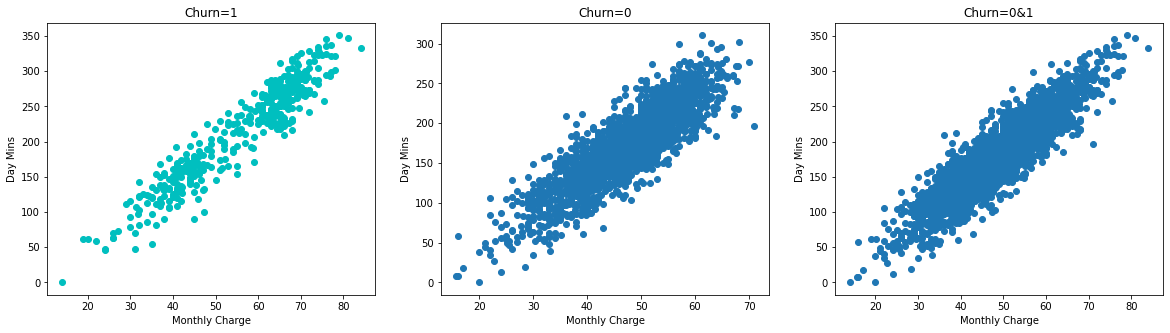

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

Text(0.5, 1.0, 'Churn=0&1')

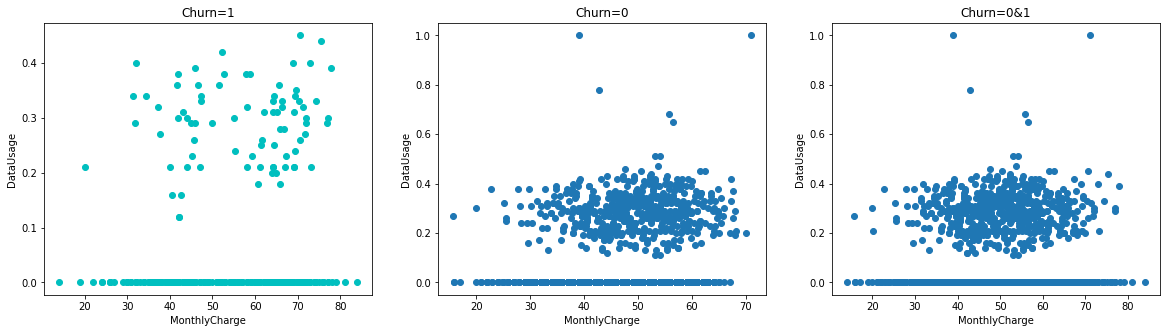

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

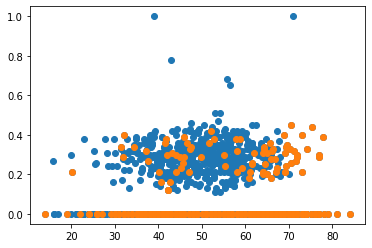

In [23]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1

### More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

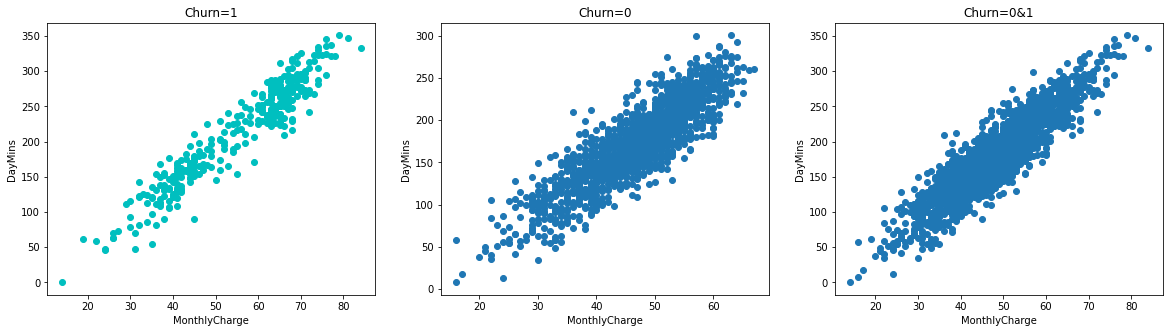

In [24]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [25]:
dataus0

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3322,1,62,1,0,0.0,4,321.1,105,78.0,13.28,11.5
3324,0,159,1,0,0.0,1,169.8,114,46.0,9.89,11.6
3327,0,79,1,0,0.0,2,134.7,98,40.0,9.49,11.8
3330,0,28,1,0,0.0,2,180.8,109,56.0,14.44,14.1


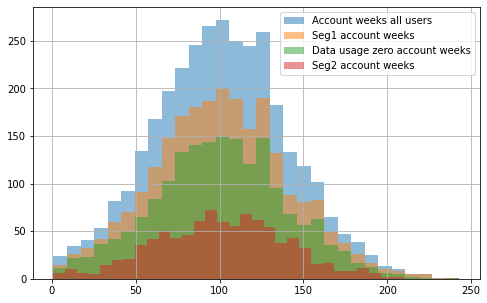

In [26]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='Data usage zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend()

In [27]:
dataus0["Churn"].value_counts()

0    1491
1     322
Name: Churn, dtype: int64

In [28]:
# % Churn in Zero Data Usage Customers
(322*100)/(1491+322)

17.76061776061776

In [29]:
len(seg1)

2420

In [30]:
seg1["Churn"].value_counts()

0    2017
1     403
Name: Churn, dtype: int64

In [31]:
# % Churn in Seg1
(403*100)/(2017+403)

16.65289256198347

### Data users within segemet 1

In [32]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
11,0,74,1,0,0.34,0,187.7,127,49.4,8.17,9.1
13,0,95,1,0,0.44,3,156.6,88,52.4,12.38,12.3
20,0,147,1,0,0.31,0,155.1,117,50.1,11.99,10.6
...,...,...,...,...,...,...,...,...,...,...,...
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3325,0,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9


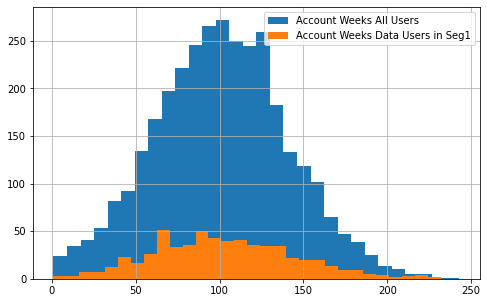

In [33]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [34]:
dataus["Churn"].value_counts()

0    526
1     81
Name: Churn, dtype: int64

In [35]:
# % Churn in Custoemrs with data usege in seg1
(81*100)/(526+81)

13.344316309719934

### Segment 2. Customers who's monthly charges are 30 onwards and data usage is >1.

In [36]:
seg2

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8
...,...,...,...,...,...,...,...,...,...,...,...
3306,0,106,1,1,2.19,1,83.6,131,53.9,10.20,8.1
3315,0,149,1,1,1.76,0,148.5,106,52.6,5.73,6.5
3316,0,103,1,1,3.32,0,164.1,111,80.2,10.96,12.3
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9


In [37]:
seg2["Churn"].value_counts()

0    833
1     80
Name: Churn, dtype: int64

In [38]:
# % Churn in seg2.
(80*100)/833

9.603841536614645

In [39]:
seg2["DataPlan"].value_counts()

1    913
Name: DataPlan, dtype: int64

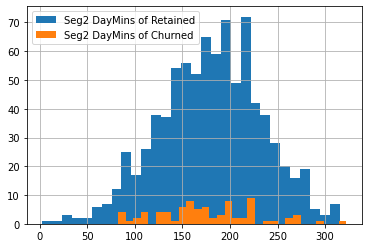

In [40]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

### Segment 2 Data Usage

Text(0.5, 1.0, 'Churn=0&1')

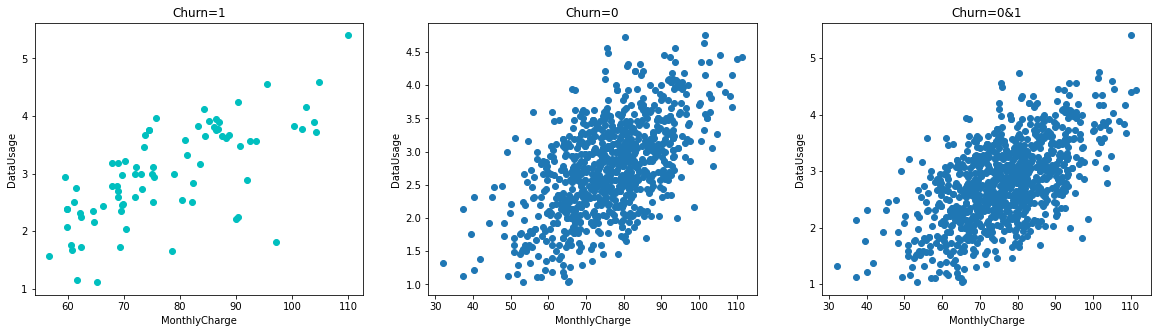

In [41]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

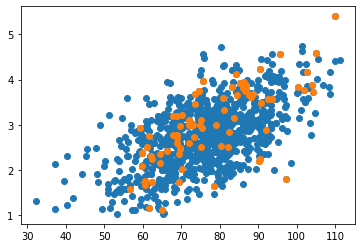

In [42]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

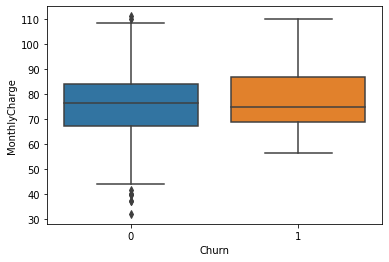

In [43]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

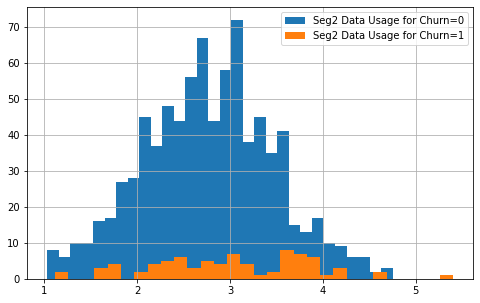

In [44]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1') 
plt.legend()

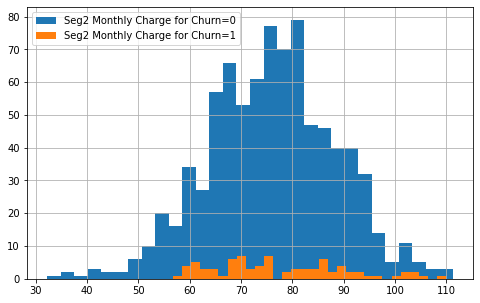

In [45]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0') 
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1') 
plt.legend()

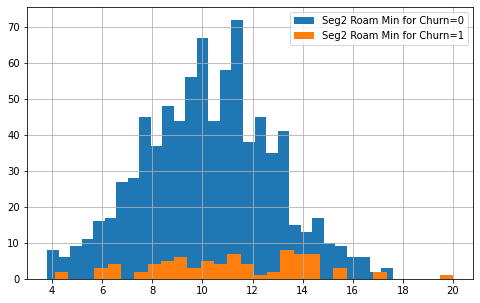

In [46]:
plt.figure(figsize=(8,5))
seg20["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=0') 
seg21["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=1')
plt.legend() 

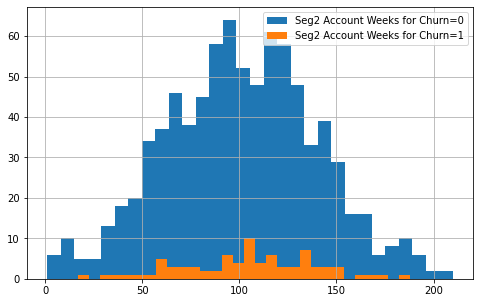

In [47]:
plt.figure(figsize=(8,5))
seg20["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=0') 
seg21["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=1')
plt.legend() 

## Seg 1 & Seg2 DayMins

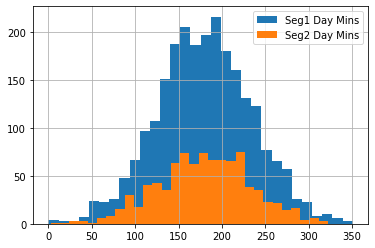

In [48]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend()

In [49]:
seg1['DayMins'].mean()

179.7163223140496

In [50]:
seg2['DayMins'].mean()

179.93088718510404

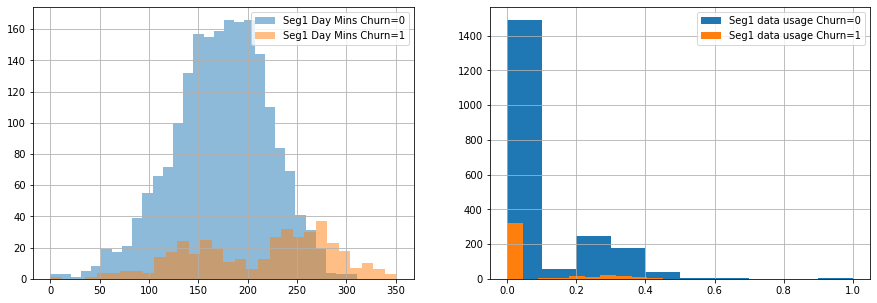

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend()

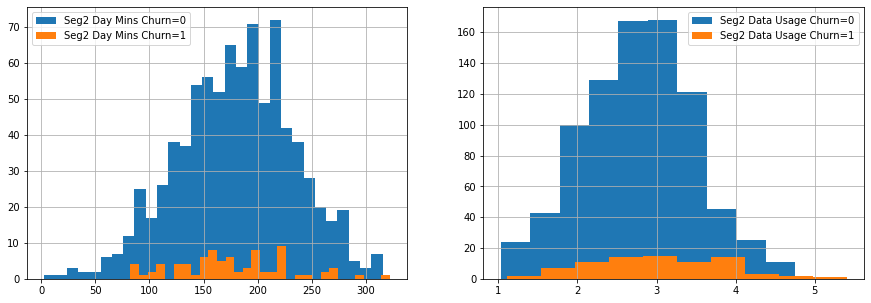

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg20["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=0')
seg21["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg20["DataUsage"].hist(label='Seg2 Data Usage Churn=0')
seg21["DataUsage"].hist(label='Seg2 Data Usage Churn=1')
plt.legend()

## Seg1 & Seg2 Monthly Charges

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Segment 2 Monthly charges'}>

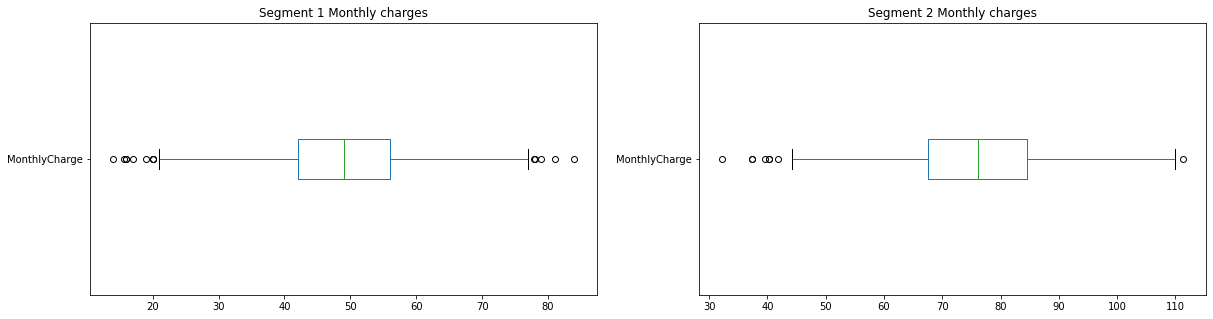

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(121)
seg1["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 1 Monthly charges")
plt.subplot(122)
seg2["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 2 Monthly charges")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

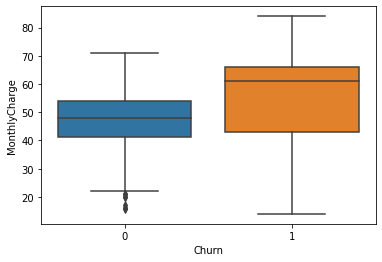

In [54]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

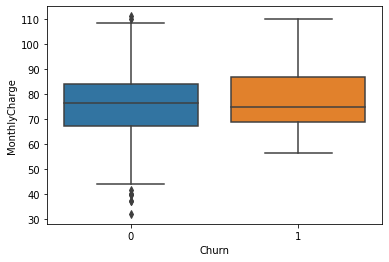

In [55]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

### SUM of Monthly Charges seg1 & 2

Sum of Monthly Charge in seg1 = 118104.1
Sum of Monthly Charge in seg2 = 69561.0


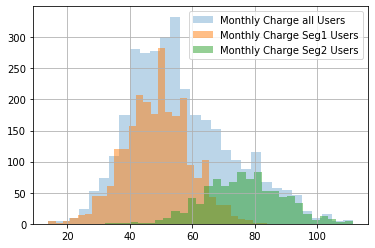

In [56]:
df["MonthlyCharge"].hist(bins=30, alpha=0.3, label='Monthly Charge all Users') 
seg1["MonthlyCharge"].hist(bins=30, alpha=0.5, label='Monthly Charge Seg1 Users') 
seg2["MonthlyCharge"].hist(bins=30, alpha=0.5,label='Monthly Charge Seg2 Users') 
plt.legend()

print("Sum of Monthly Charge in seg1 =", seg1["MonthlyCharge"].sum())
print("Sum of Monthly Charge in seg2 =", seg2["MonthlyCharge"].sum())

## Roaming

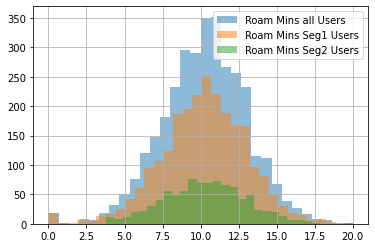

In [57]:
df["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins all Users')
seg1["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg1 Users')
seg2["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg2 Users')
plt.legend()

20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


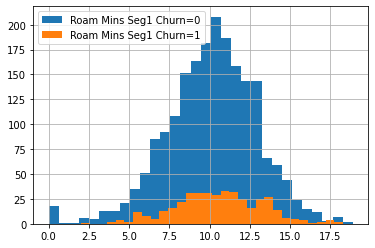

In [58]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1') 
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

8526.5 mins, per 833 customers who not churned.
891.6000000000001 mins, per 80 customers who churned.


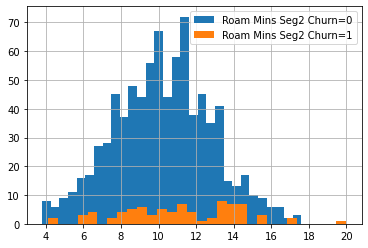

In [59]:
seg20["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=0')
seg21["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=1')
plt.legend()

print(f"{seg20.RoamMins.sum()} mins, per {len(seg20.RoamMins)} customers who not churned.")
print(f"{seg21.RoamMins.sum()} mins, per {len(seg21.RoamMins)} customers who churned.")

## Customer Service Calls

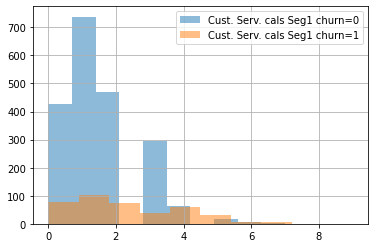

In [60]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend()

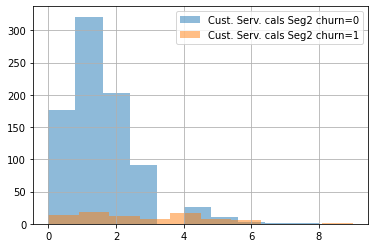

In [61]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend()

## Contract Renewal

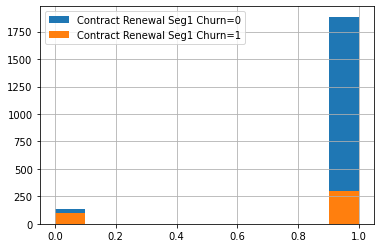

In [62]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() 

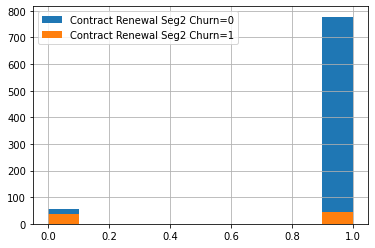

In [63]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()

## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimise price of talk time for segment 1 customers.
* Introduce data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If possible optimising price of data plans can retain segment 2 customers also.

# Machine Learning Model

## EDA

In [64]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


<AxesSubplot:>

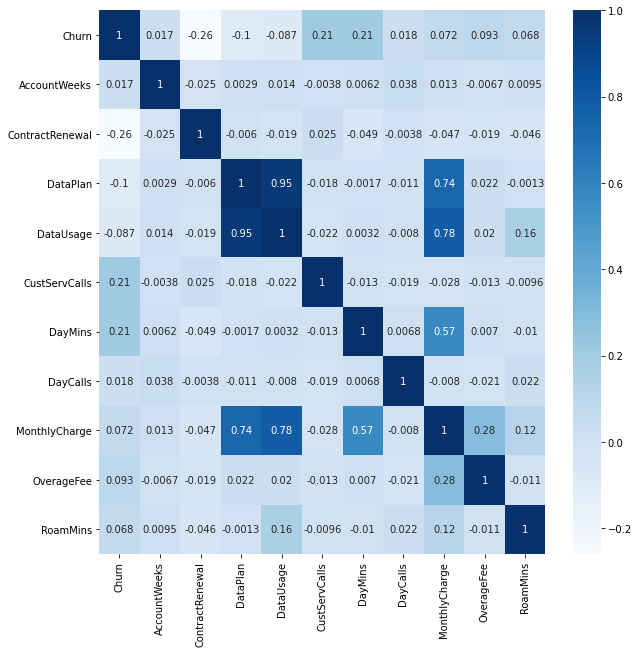

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:263: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(-np.pi, np.pi))


<AxesSubplot:>

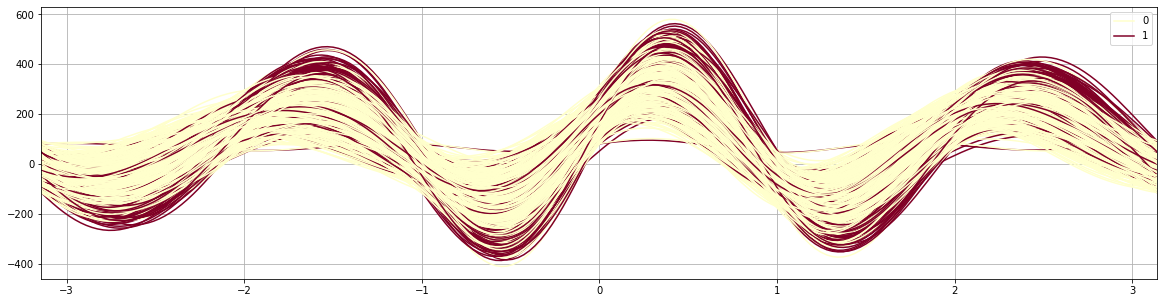

In [66]:
plt.figure(figsize=(20,5))
pd.plotting.andrews_curves(df, 'Churn', colormap='YlOrRd')

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

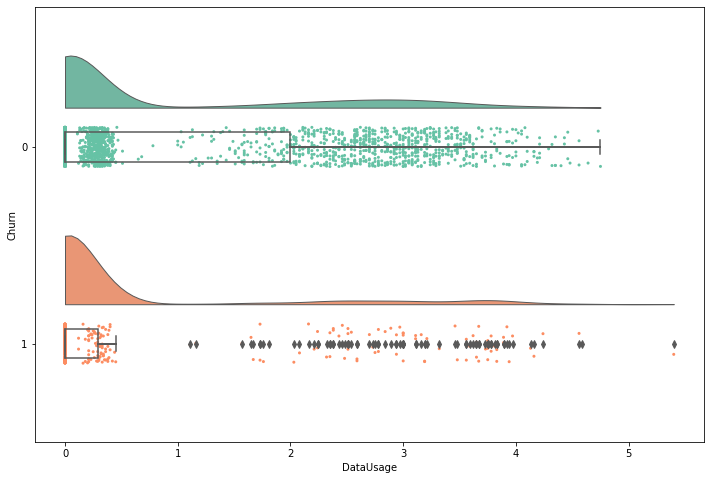

In [67]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

<AxesSubplot:xlabel='DayMins', ylabel='Churn'>

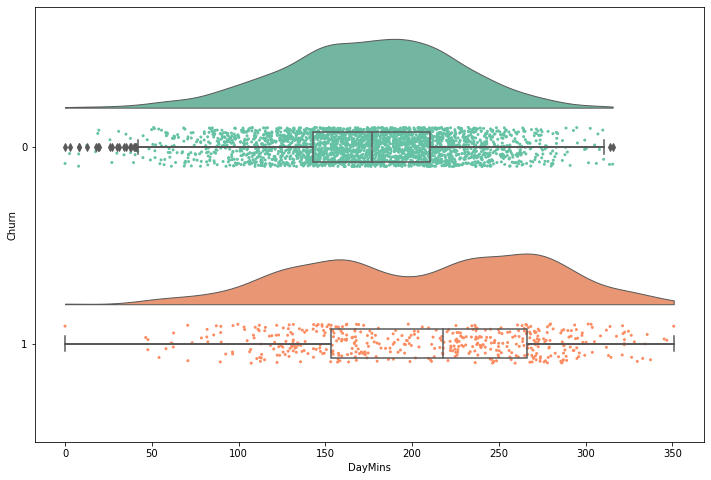

In [68]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DayMins', orient = 'h')

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Churn'>

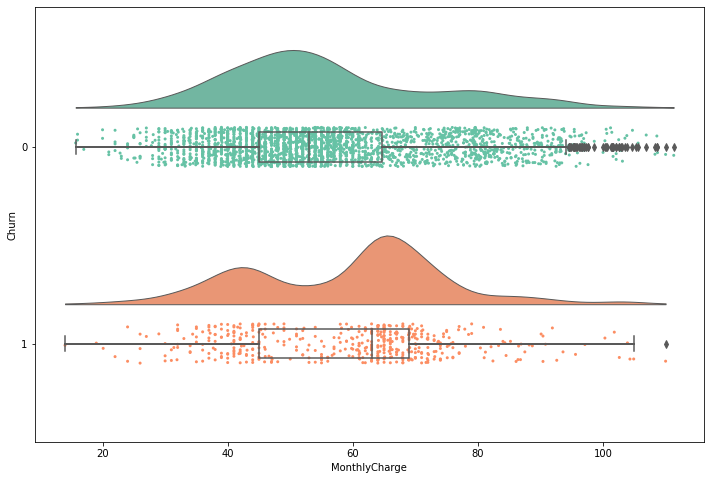

In [69]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'MonthlyCharge', orient = 'h')

<AxesSubplot:xlabel='CustServCalls', ylabel='Churn'>

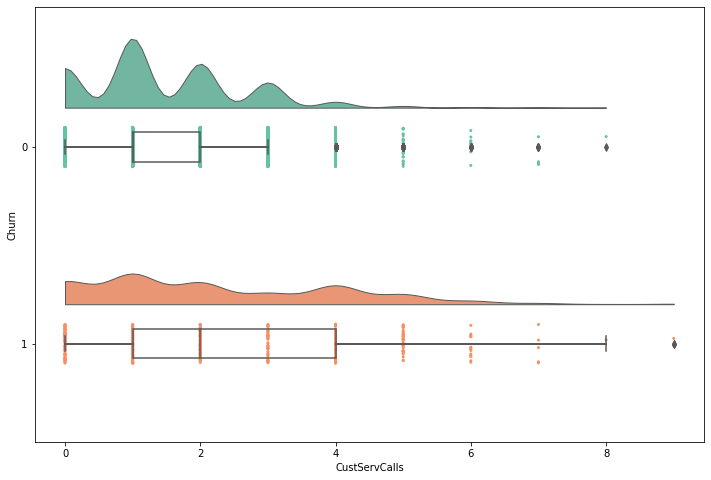

In [70]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'CustServCalls', orient = 'h')

<AxesSubplot:xlabel='AccountWeeks', ylabel='Churn'>

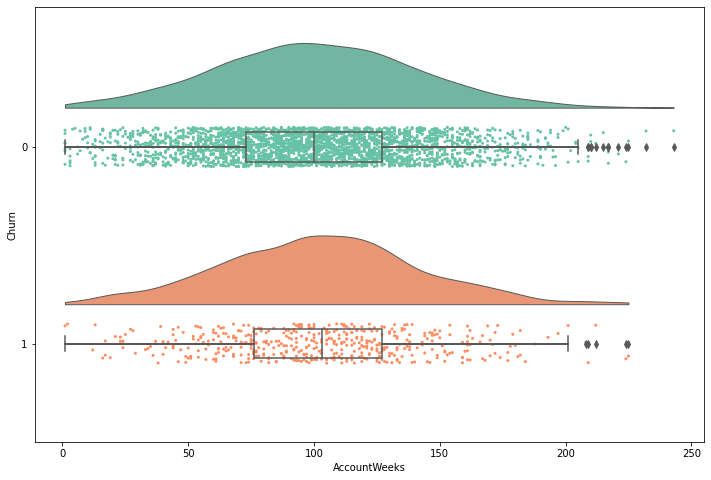

In [71]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'AccountWeeks', orient = 'h')

<AxesSubplot:xlabel='DataPlan', ylabel='Churn'>

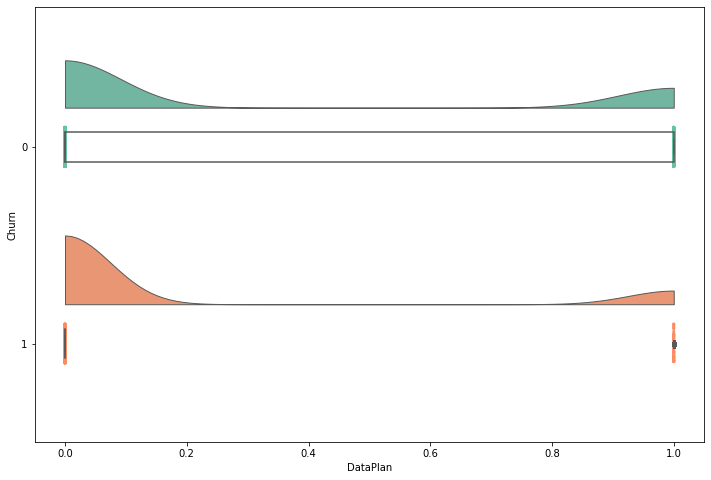

In [72]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataPlan', orient = 'h')

<AxesSubplot:xlabel='OverageFee', ylabel='Churn'>

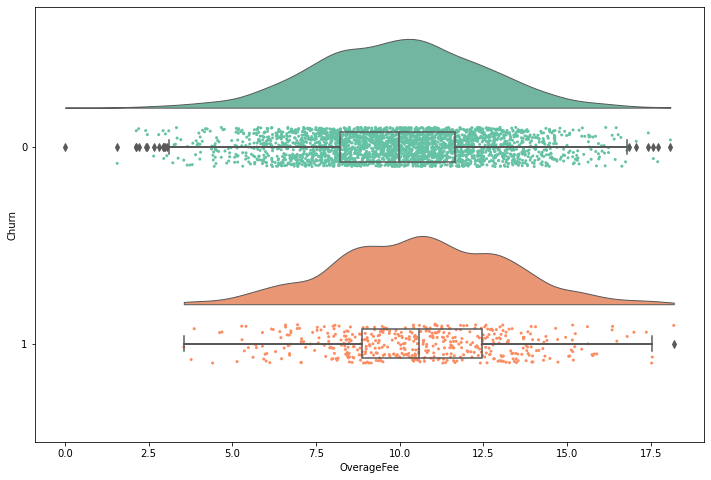

In [73]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'OverageFee', orient = 'h')

In [74]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Engineering

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.81498972,  0.32388048, -0.61444668, ..., -0.07520216,
        -0.03472422, -0.29709755],
       [ 0.76425984,  0.32388048,  1.62748051, ...,  0.74902185,
         0.6321183 , -0.29709755],
       [-0.33870811,  0.32388048,  1.62748051, ...,  0.21389134,
         0.45850249, -0.26121768],
       ...,
       [-0.86512463,  0.32388048, -0.61444668, ..., -0.97323726,
         1.20031547, -0.3688573 ],
       [ 1.71682307,  0.32388048, -0.61444668, ..., -0.62878544,
        -0.51216768, -0.11769819],
       [-1.61714823,  0.32388048,  1.62748051, ..., -0.98553911,
        -1.41970484, -0.58413653]])

In [77]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.27279233,  0.3350143 , -0.62642243, ..., -0.08790331,
         2.55851252,  1.15848864],
       [-0.8877333 ,  0.3350143 , -0.62642243, ..., -1.10258963,
         0.32780258,  0.9084995 ],
       [-0.10563994,  0.3350143 , -0.62642243, ..., -2.53508797,
        -0.8111995 , -1.23426457],
       ...,
       [-0.6102163 ,  0.3350143 , -0.62642243, ..., -1.34133935,
         0.27656719,  0.19424481],
       [-0.96341975,  0.3350143 , -0.62642243, ..., -0.98321477,
        -0.70478754,  0.72993583],
       [ 0.97919923,  0.3350143 , -0.62642243, ...,  0.32990871,
         0.658862  , -1.51996645]])

## Decision Tree 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       940
           1       0.90      0.49      0.64       160

    accuracy                           0.92      1100
   macro avg       0.91      0.74      0.80      1100
weighted avg       0.92      0.92      0.91      1100



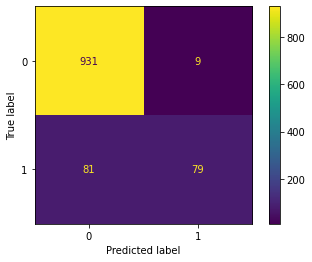

In [78]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=3)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test) 

## Random Forest

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.89      0.63      0.74       160

    accuracy                           0.93      1100
   macro avg       0.91      0.81      0.85      1100
weighted avg       0.93      0.93      0.93      1100



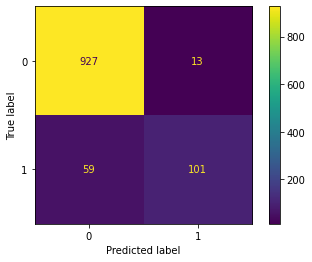

In [79]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)  

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.83      0.66      0.74       160

    accuracy                           0.93      1100
   macro avg       0.89      0.82      0.85      1100
weighted avg       0.93      0.93      0.93      1100



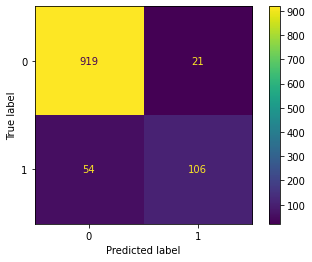

In [80]:
clfg = GradientBoostingClassifier(n_estimators=300, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test) 

## KNN

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       940
           1       0.76      0.39      0.51       160

    accuracy                           0.89      1100
   macro avg       0.83      0.68      0.73      1100
weighted avg       0.88      0.89      0.88      1100



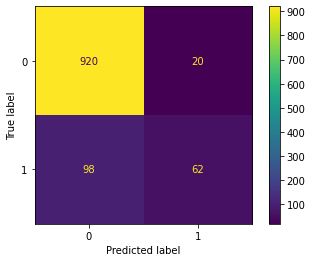

In [81]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

## AUC ROC

In [82]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [83]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8687599734042553 0.9288430851063829 0.9160638297872339 0.8756183510638298


In [84]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

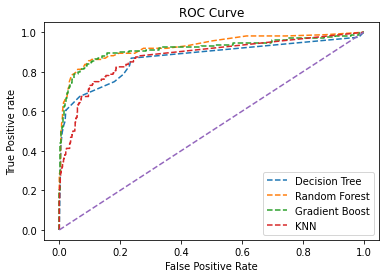

In [85]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Conclusion
## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimize the price of talk time for segment 1 customers.
* Introduce a data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If the possible optimizing price of data plans can retain segment 2 customers also.


## Machine Learning Models
* Random Forest, Gradientboost are best.
* Gradientboost, decision tree, KNN are hyperparameter tuned. Random forest is not hyperparameter tuned.
* Random forest is working like gradient boost(tuned model) without hyperparameter tuning so it is the best algorithm because it has by default raw sampling procedure. 
* This case class imbalance is 85/15 % still it is not like <5% kind of case, so random forest will do best because of its default sampling procedure before applying special class imbalance strategies.

---